# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [164]:
import pandas as pd
import numpy as np 


data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']



#----------------------------------------
# 1.
df=pd.DataFrame.from_dict(data)
df.index=labels
print('----------------------------------')
print('1.1')
print(df)
print('----------------------------------')
print('')
print('')
#----------------------------------------

#----------------------------------------
#2.
print('----------------------------------')
print('1.2')
print(df.loc[df.visits >= 3])
print('----------------------------------')
print('')
print('')
# cats and dogs 
#----------------------------------------

print('----------------------------------')
print('1.3')
print(df.loc[(df.visits== 3) & (df.animal=='cat')])
print('----------------------------------')
print('')
print('')

#4.
print('----------------------------------')
print('1.4')
print(F"sum of all visits: {df.visits.sum()}")
print('----------------------------------')

#5
print('----------------------------------')
print('1.5:mean age for each different animal')
print(df.groupby('animal').mean().age)
print('----------------------------------')

#6
Dict={'animal': ['dog'],
        'age': [6],
        'visits': [1],
        'priority': ['yes']}

df2=pd.DataFrame.from_dict(Dict)
df2.index=['k']
df=df.append(df2)

print('----------------------------------')
print('1.6: a) modified df ')
print(df)
print('----------------------------------')

df=df.drop(index='k')
print('----------------------------------')
print('1.6: b) original df ')
print(df)
print('----------------------------------')


----------------------------------
1.1
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
----------------------------------


----------------------------------
1.2
  animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no
----------------------------------


----------------------------------
1.3
  animal  age  visits priority
b    cat  3.0       3      yes
f    cat  2.0       3       no
----------------------------------


----------------------------------
1.4
sum of all visits: 19
----------------------------------
----------------------------------
1.5:mean age for each different animal
animal
cat      2.5
dog      5.0
snake    2.

# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [165]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df=df.loc[df['A'].shift() != df['A']]
df

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [166]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
#idxmin gets the index of the smalest value 
col_min=df.sum().idxmin()
print(df.sum())
print('')
print(F" column of numbers with the smallest sum is :{col_min}")


a    2.381206
b    2.622295
c    1.708243
d    3.140660
e    2.391175
f    3.349281
g    3.308331
h    2.876893
i    1.790866
j    1.005893
dtype: float64

 column of numbers with the smallest sum is :j


# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [167]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
#df.shape[0] gets the number or rows 
print(df.shape[0]-df.duplicated(keep=False).sum())


4


# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [168]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})


print( (df.groupby(['grps']).vals.nlargest(3))
.groupby('grps').sum() )


grps
a    409
b    156
c    345
Name: vals, dtype: int64


# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [169]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
#we have to use interpolate or shift+[10]

#df.FlightNumber=df.FlightNumber.astype(int)
df.FlightNumber=df.FlightNumber.interpolate()
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [170]:
#splits the str 
df['from']=df.From_To.str.split('_',expand=True)[0]
df['to']=df.From_To.str.split('_',expand=True)[1]

#removing the column 'From_To'
df.drop(columns=['From_To'])
#changing the order of the columns 
df = df[['from', 'to', 'FlightNumber', 'RecentDelays','Airline']]
df

,from,to,FlightNumber,RecentDelays,Airline
0,LoNDon,paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid,miLAN,10055.0,[],<Air France> (12)
2,londON,StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest,PaRis,10075.0,[13],12. Air France
4,Brussels,londOn,10085.0,"[67, 32]","""Swiss Air"""


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [171]:

#we are only keepking a-z A-Z 
df['Airline']=df.Airline.str.replace('[^a-zA-Z ]', '')

#.title -> first letter of str is
#upper case the rest is lower case 
df['from']=df['from'].str.title()
df['to']=df['to'].str.title()
df



,from,to,FlightNumber,RecentDelays,Airline
0,London,Paris,10045.0,"[23, 47]",KLM
1,Madrid,Milan,10055.0,[],Air France
2,London,Stockholm,10065.0,"[24, 43, 87]",British Airways
3,Budapest,Paris,10075.0,[13],Air France
4,Brussels,London,10085.0,"[67, 32]",Swiss Air


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [172]:
import datetime
df = pd.read_csv('data/country_total.csv')

df.month = df.month.astype(str)
df['year']=df.month.str.split('.',expand=True)[0].astype(int)
df['month']=df.month.str.split('.',expand=True)[1]

#since the 10th month is in the format 'year'.1
df['month'].loc[df['month']=='1']='10'

#str-->int
df['month']=df['month'].astype(int)

#Changing the order of the columns 
df=df[['country','seasonality','year','month','unemployment','unemployment_rate']]
df

,country,seasonality,year,month,unemployment,unemployment_rate
0,at,nsa,1993,1,171000,4.5
1,at,nsa,1993,2,175000,4.6
2,at,nsa,1993,3,166000,4.4
3,at,nsa,1993,4,157000,4.1
4,at,nsa,1993,5,147000,3.9
...,...,...,...,...,...,...
20791,uk,trend,2010,6,2429000,7.7
20792,uk,trend,2010,7,2422000,7.7
20793,uk,trend,2010,8,2429000,7.7
20794,uk,trend,2010,9,2447000,7.8


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [173]:
df = pd.read_csv('data/country_sex_age.csv')

ER_S=df.groupby(['sex','seasonality']).mean().unemployment_rate
print(ER_S)
print('')

A_G=df.groupby(['age_group','seasonality']).mean().unemployment_rate
print(A_G)

print('')
ER_SAG=df.groupby(['age_group','sex','seasonality']).mean().unemployment_rate
print(ER_SAG)

print('-----------------------------------------------')

ER_S=df.groupby(['sex']).mean().unemployment_rate
print(ER_S)
print('')

A_G=df.groupby(['age_group']).mean().unemployment_rate
print(A_G)

print('')
ER_SAG=df.groupby(['age_group','sex']).mean().unemployment_rate
print(ER_SAG)
print('')
print('Since each method of calculating the unemployment gives \n\
a small difference in the average values, I would group over it.')


sex  seasonality
f    nsa            13.179216
     sa             12.908743
     trend          12.862163
m    nsa            11.708432
     sa             11.662290
     trend          11.643015
Name: unemployment_rate, dtype: float64

age_group  seasonality
y25-74     nsa             6.870746
           sa              6.918446
           trend           6.926319
y_lt25     nsa            18.016902
           sa             17.690707
           trend          17.617224
Name: unemployment_rate, dtype: float64

age_group  sex  seasonality
y25-74     f    nsa             7.539839
                sa              7.579982
                trend           7.579934
           m    nsa             6.201653
                sa              6.256909
                trend           6.272703
y_lt25     f    nsa            18.818593
                sa             18.323837
                trend          18.231025
           m    nsa            17.215211
                sa             17.067671
   

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [174]:
df['group_size']=df.unemployment/(df.unemployment_rate/100)

print(df.groupby(['seasonality','sex']).mean())
print(3*'\n')

print(df.groupby(['sex']).mean())
print('')
print('It does change depending on the unemployment seasonality calculation method')

                       month   unemployment  unemployment_rate    group_size
seasonality sex                                                             
nsa         f    1999.433879  177911.876554          13.179216  1.766895e+06
            m    1999.433879  194571.376335          11.708432  2.372834e+06
sa          f    1999.424416  194685.050591          12.908743  1.985283e+06
            m    1999.424416  214001.496366          11.662290  2.609984e+06
trend       f    1999.336505  191593.353518          12.862163  1.948208e+06
            m    1999.336505  211275.951557          11.643015  2.552411e+06




           month   unemployment  unemployment_rate    group_size
sex                                                             
f    1999.398199  188137.566138          12.982629  1.900775e+06
m    1999.398199  206702.405002          11.671026  2.512825e+06

It does change depending on the unemployment seasonality calculation method


# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [175]:
df=pd.read_csv('data/tennis.csv')

# I use the next line to see the different columns 
#df.columns

#1------------------------------------
#sum of all the wins (True=1)
n_wins=df['win'].sum()
print(F'Number of wins:{n_wins}')
print('')
#2------------------------------------
#number of games (can also use.count())
n_games=df.shape[0]
n_lost=n_games-n_wins
ratio=n_wins/n_lost
print(F'win/loss ratio is :{ratio}')
print('')

#3------------------------------------
##########################################################################
#this is a list of the player of rank n 
#(just to compare with Federer's top 5 opponents)
rank=1
p2_rank=df[['player2 name','ranking']]
L=list(p2_rank.loc[p2_rank['ranking']==str(rank)]['player2 name'].unique())
print(F'players of with ranking {rank}:\n{L}')
print('')
##########################################################################

df2=df.groupby('player2 name').sum()['win']
df3=df.groupby('player2 name').count()['win']
#df3 to  dataframe
df3=df3.to_frame()
df3['win_sum']=df2
#renaming the columns
df3.columns=['N_games','win_sum']

#getting the number of wins
#(since when true ->Federer won)
df3.win_sum=df3.N_games-df3.win_sum
df3['ratio']=df3.win_sum/df3.N_games

#minimum number of games
#Comparing players who have played 
#N or more games against Federer
N=19
df3=df3.loc[df3.N_games>=N]

#getting the 5 highest values 

print("Federer's top 5 opponents:")
df3.ratio.nlargest(5)



Number of wins:972

win/loss ratio is :4.695652173913044

players of with ranking 1:
['Lleyton Hewitt', 'Andy Roddick', 'Juan Carlos Ferrero', 'Rafael Nadal', 'Novak Djokovic']

Federer's top 5 opponents:


player2 name
Rafael Nadal        0.642857
Andy Murray         0.526316
Novak Djokovic      0.448276
David Nalbandian    0.421053
Lleyton Hewitt      0.307692
Name: ratio, dtype: float64

# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

best year:2007, with 7245735.0$


Text(0, 0.5, 'Wins')

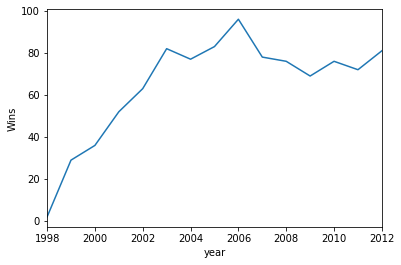

In [176]:

import matplotlib.pylab as plt
import seaborn as sns
df=pd.read_csv('data/tennis.csv')

# part 1 ---------------------------------------------------------
#only getting the rows when Federer won
wins=df.loc[df.win==True]

#only keeping the final rounds
wins=wins.loc[wins['tournament round']=='F']

#removing $ and , 
wins['tournament prize money']=wins['tournament prize money'].\
    str.replace('[A$,]','')

# we will set the empty rows to 0
wins['tournament prize money'].loc[wins['tournament prize money'].str.len()==0]=0
wins['tournament prize money']=wins['tournament prize money'].\
    dropna().astype(float)

money_year=wins.groupby('year').sum()['tournament prize money']

best_year=money_year.idxmax()
print(F'best year:{best_year}, with {money_year.max()}$')


# part 2 ---------------------------------------------------------
# if we look at the win per year vs year graph we can 
#see that he has inprooved over time from 
# 1998 to 2006  

win_year=df.groupby('year').sum()['win']
win_year.plot()
plt.ylabel('Wins')



# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [177]:
#most of 5.3 was done at 5.2
print(F'Federer made {money_year.sum()}$')

Federer made 44934964.0$
